<a href="https://colab.research.google.com/github/Konkamahesh/COLOUR-DETECTION/blob/main/Colour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the image
img_path = '/content/colorpic.jpg'
img = cv2.imread(img_path)

In [ ]:
# Load the CSV data
csv_path = '/content/colors.csv'
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(csv_path, names=index, header=None)

In [ ]:
# Function to calculate minimum distance from all colors and get the most matching color
def getColorName(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname


In [ ]:
# Function to handle mouse events
def handle_mouse_event(event):
    if event.dblclick:
        x = int(event.xdata)
        y = int(event.ydata)
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)
        color_name = getColorName(r, g, b)
        print(f"Color: {color_name} R={r} G={g} B={b}")


In [ ]:
# Create a figure and bind the mouse event handler
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', handle_mouse_event)

<Figure size 640x480 with 0 Axes>

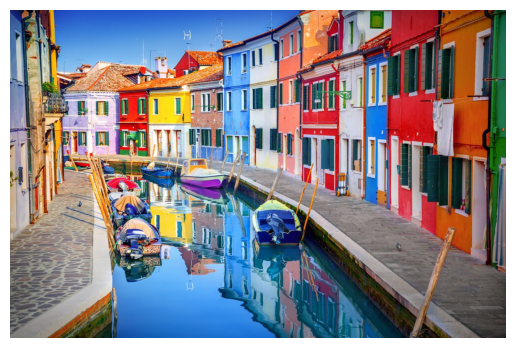

In [ ]:
# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()